In [49]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import fetch_california_housing, make_regression
from sklearn.model_selection import train_test_split

# Generating Data

This creates a set of 100 data points, each of which has 1 feature, in an approximately linear pattern.
The “approximately” is controlled by the parameter noise, which feeds in Gaussian noise. 
The larger the value of noise, the more the points are scattered.

In [50]:
X, y = make_regression(n_samples=100, n_features=1, noise = 2)

# Splitting Data

Splits the data that was previously generated (instead of data that is loaded).

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training

Linear Regression is a supervised learning algorithm that models the relationship between input features (X) and a continuous output variable (y) using a linear equation.

The equation:
$$y = mx + b$$
- $y$ is the predicted output
- $x$ is the input feature
- $m$ is the slope (weight)
- $b$ is the y-intercept (bias)

How it works:
1. Initialize random weights and bias
2. For each data point:
   - Make prediction using current weights
   - Calculate error (difference between prediction and actual)
   - Adjust weights to minimize error
3. Use gradient descent to find optimal weights
4. Repeat until convergence

Why it's used:
- Simple to understand and implement
- Fast to train
- Works well for linear relationships
- Provides interpretable results
- Good baseline model
- Useful for feature importance analysis

Drawbacks:
- Assumes linear relationship between variables
- Sensitive to outliers
- Can underfit complex patterns
- Requires independent features
- Assumes normal distribution of errors
- Poor performance with non-linear data
- Limited to continuous output variables

In [52]:
regr = linear_model.LinearRegression() 
regr.fit(X_train, y_train)

LinearRegression()

# Scores

In [53]:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

print('Variance score: %.2f' % regr.score(X_test, y_test))

Mean squared error: 7.44
Variance score: 1.00


# Plotting Outputs

* Plotting regression line against the data to evaluate the model

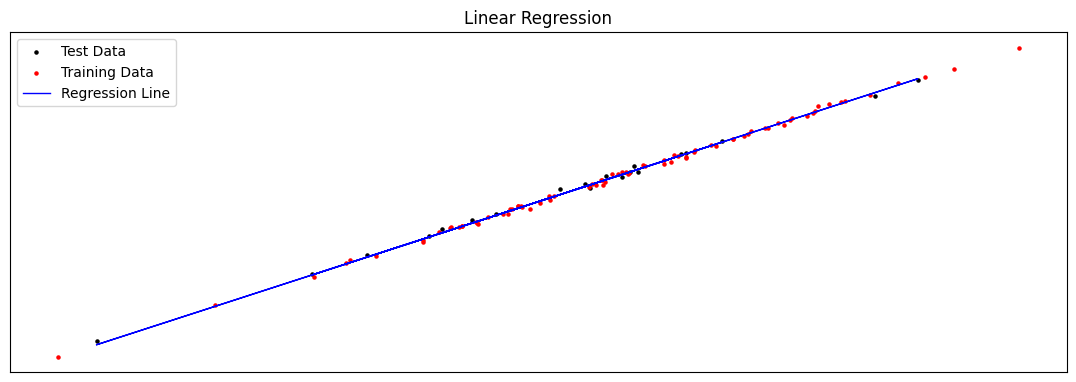

In [54]:
plt.figure(figsize=(30, 15))

plt.subplot(3, 2, 1)
plt.title("Linear Regression")

plt.scatter(X_test, y_test, color='black', s=5, label="Test Data")  # Test data
plt.scatter(X_train, y_train, color='red', s=5, label="Training Data")  # Training data
plt.plot(X_test, regr.predict(X_test), color='blue', linewidth=1, label="Regression Line")  # The line we learnt

plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

# Custom Gradient Descent

Gradient descent is an optimization algorithm used to find the best model parameters (weights) by minimizing the loss/error function.
Gradient descent works by:

1. Starting with some initial values for the weights ($w_0$, $w_1$)
2. Repeatedly moving "downhill" on the loss function surface by:
   - Computing the gradient (slope) of the loss function
   - Taking steps in the direction that reduces the loss
   - Step size is controlled by the learning rate α

The formula for the weight updates is:

$$w_i \leftarrow w_i - \alpha \frac{\partial}{\partial w_i}Loss(w)$$

We use gradient descent because it helps us find the minimum of the loss function, which represents the model parameters that give the best predictions. 
The loss function surface looks like a bowl, and gradient descent helps us find the bottom of this bowl where the error is minimized.

The slides show two main variants:
1. Batch gradient descent - updates weights using all examples
2. Stochastic gradient descent - updates weights using one example at a time

The choice of learning rate α is important:
- Too small: takes tiny steps, very slow
- Too large: might miss the minimum and not converge

This is all shown in the lecture through various diagrams demonstrating how gradient descent moves down the loss function surface to find optimal parameters.

### Parameters

In [55]:
alpha = 0.001  # Learning rate
repeats = 200

## Stochastic Gradient Descent

### Initial Values

In [56]:
w0 = 0
w1 = 0
errors = []
points = []

### Running Gradient Descent

For stochastic gradient descent, we update the weights after each individual training example, rather than looking at all examples at once. The update rules are:

For each example:

$$w_0 \leftarrow w_0 + \alpha(y - h_w(x))$$
$$w_1 \leftarrow w_1 + \alpha(y - h_w(x))x$$

Where:
- $\alpha$ is the learning rate
- $y$ is the actual output value
- $h_w(x) = w_0 + w_1x$ is the predicted value
- $x$ is the input feature value

The slides show that compared to batch gradient descent, SGD:
1. Can be quicker than batch gradient descent
2. May not converge if learning rate is constant
3. Can be made to converge by decreasing the learning rate over time

The code you provided matches this algorithm by:
1. Iterating through each training example individually
2. Computing the prediction and error for that example: $$h_w(x) = w_0 + w_1x$$
3. Immediately updating both weights based on that single example's error before moving to the next example

This matches the formula shown in lecture slide 67 where the updates are done per example rather than summing over all examples as in batch gradient descent.

The key difference from batch gradient descent is that SGD updates weights after each example rather than accumulating errors across all examples before updating.

In [57]:
for j in range(repeats):
    for i in range(len(X_train)):

        # compute error
        predict = w0 + (X_train[i] * w1)
        error = y_train[i] - predict
        errors.append(error) 

        # Update weights
        w0 = w0 + (alpha * error)
        w1 = w1 + ((alpha * error) * X_train[i])


print("w0: %2f" % w0.item())
print("w1: %2f" % w1.item())

w0: -0.398767
w1: 48.822689


### Compute mean using the testing data

The mean squared error is used as a loss/error function to measure how well our model fits the data. 
It calculates the average squared difference between the predicted values and actual values.

The formula for MSE is:

$$MSE = \frac{1}{N}\sum_{j=1}^{N}(y_j - h_w(x_j))^2$$

Where:
- $N$ is the number of test examples
- $y_j$ is the actual value
- $h_w(x_j) = w_0 + w_1x_j$ is the predicted value
- $x_j$ is the input feature

The code implements this by:
1. Computing the squared error $(y_j - h_w(x_j))^2$ for each test example
2. Summing up all these squared errors
3. Dividing by the total number of test examples $N$ to get the mean

From the slides, we use squared error because this penalizes larger errors more heavily than smaller ones, helping the model focus on reducing large prediction errors during training. 
This is shown in slide 55 where the slides note this is traditionally used as the L2 loss function.

In [58]:
predicts = []
mean_error = 0
for i in range(len(X_test)):
    predict = w0 + (X_test[i] * w1)
    error = (y_test[i] - predict) ** 2 # Computing squared error
    mean_error  += error
    predicts.append(predict)

mean_error = mean_error / len(X_test) # Computing mean squared error
print("Mean squared error: %2f" % mean_error.item())


Mean squared error: 7.447492


### Plotting

Plot the examples with the predictions and the squared error evolution

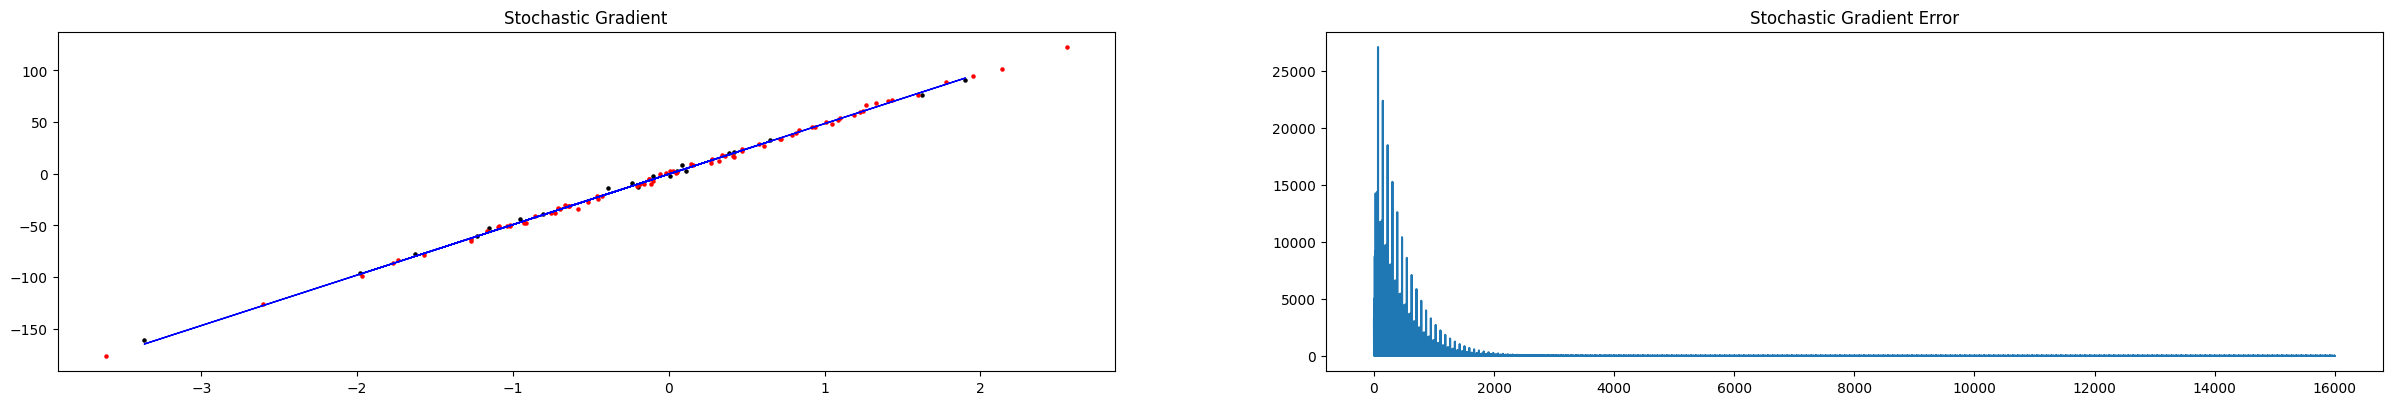

In [59]:
for i in range(len(errors)):
    errors[i] = errors[i] ** 2
    points.append(i)

plt.figure(figsize=(30, 15))
plt.subplot( 3, 2, 3 )
plt.title("Stochastic Gradient")
plt.scatter(X_test, y_test, color="black",s=5)
plt.scatter(X_train, y_train, color="red",s=5)
plt.plot(X_test, predicts, color='blue', linewidth=1) # The line we learnt

plt.subplot( 3, 2, 4 )
plt.title("Stochastic Gradient Error")
plt.plot(points, errors)

## Batch Gradient Descent

### Initial Values

Resetting the initial values from [Stochastic Gradient Descent](#stochastic-gradient-descent)

In [60]:
w0 = 0
w1 = 0
errors = []
points = []

For batch gradient descent, we accumulate errors across all training examples before updating the weights once per epoch. 
The update rules are:

$$w_0 \leftarrow w_0 + \alpha \sum_{j}(y_j - h_w(x_j))$$
$$w_1 \leftarrow w_1 + \alpha \sum_{j}(y_j - h_w(x_j))x_j$$

Where:
- $\alpha$ is the learning rate
- $y_j$ is the actual output value
- $h_w(x_j) = w_0 + w_1x_j$ is the predicted value
- $x_j$ is the input feature value
- The sum $\sum_{j}$ is taken over all training examples

The code implements this by:
1. Computing predictions and errors for all examples first:
   - $error\_sum = \sum_{j}(y_j - h_w(x_j))$ for updating w₀
   - $error\_sum\_x = \sum_{j}(y_j - h_w(x_j))x_j$ for updating w₁
2. Only updating the weights after seeing all examples

From slide 66, this is guaranteed to converge, but can be slow since we need to compute across all $N$ examples before making each update. 
The squared error sum is tracked separately just for monitoring the training progress.

The key difference from stochastic gradient descent is that batch gradient descent accumulates errors across all examples before making a single weight update, rather than updating after each example.

In [61]:
for j in range(repeats):
    error_sum = 0
    squared_error_sum = 0
    error_sum_x = 0
    for i in range(len(X_train)):

        # compute error
        predict = w0 + (X_train[i] * w1)
        squared_error_sum = squared_error_sum + (y_train[i]-predict)**2 # Error to produce plot
        error_sum = error_sum + y_train[i] - predict # Error to update w0
        error_sum_x = error_sum_x + (y_train[i] - predict) * X_train[i] # Error to update w1

    # Update weights and append error
    w0 = w0 + (alpha * error_sum)
    w1 = w1 + (alpha * error_sum_x)
    errors.append(squared_error_sum/len(X_train)) # Stash the error in an array

print("w0: %2f" % w0.item())
print("w1: %2f" % w1.item())

w0: -0.408237
w1: 48.814786


### Compute mean using the testing data

In [62]:
predicts = []
mean_error = 0
for i in range(len(X_test)):
    predict = w0 + (X_test[i] * w1)
    error = (y_test[i] - predict) ** 2      # Computing squared error
    mean_error  += error
    predicts.append(predict)

mean_error = mean_error / len(X_test)       # Computing mean squared error

print("Mean squared error: %2f" % mean_error.item())

Mean squared error: 7.439659


### Plotting

Plot the examples with the predictions and the squared error evolution

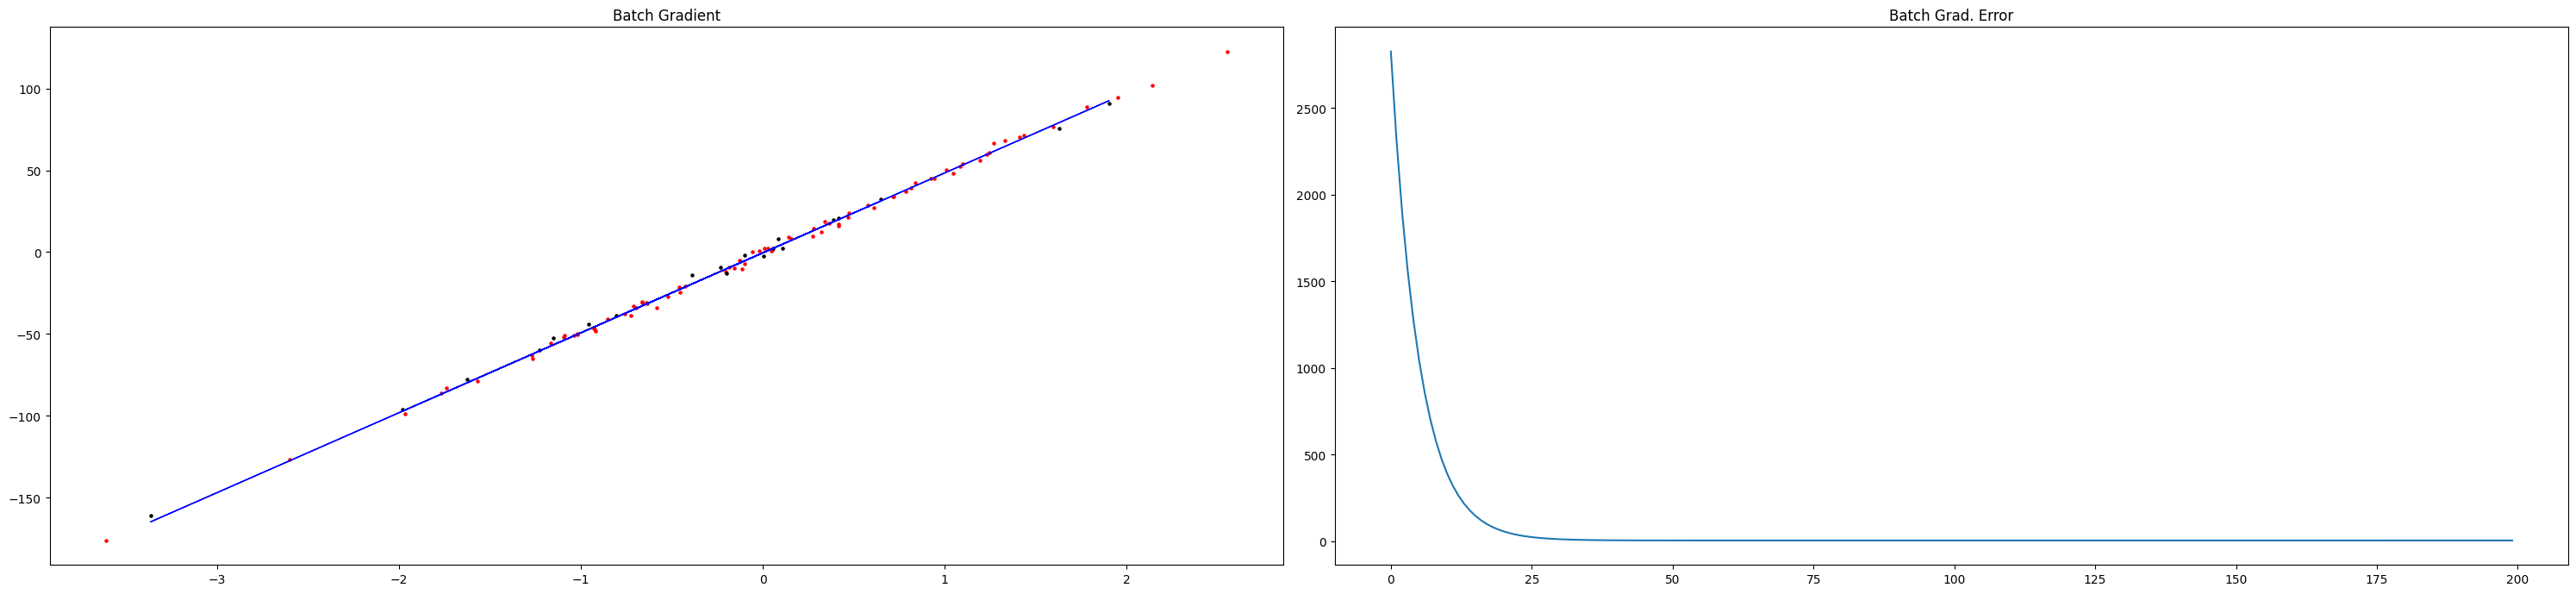

In [63]:
for i in range(len(errors)):
    points.append(i)

plt.figure(figsize=(30, 20))
plt.subplot( 3, 2, 5 )
plt.title("Batch Gradient")
plt.scatter(X_train, y_train, color="red",s=5)
plt.scatter(X_test, y_test, color="black",s=5)
plt.plot(X_test, predicts, color='blue', linewidth=1) # The line we learnt


plt.subplot( 3, 2, 6 )
plt.title("Batch Grad. Error")
plt.plot(points, errors)
plt.tight_layout()
plt.show()

## Multivariate Gradient Descent

Multivariate linear regression extends gradient descent to handle multiple variables.

For a set of variables $x_{j,1}, ..., x_{j,i}, ..., x_{j,n}$, we modify the model to handle multiple weights $w_i$.

We simplify by creating a dummy variable $x_{j,0} = 1$ to pair with $w_0$. Then the predicted value becomes:

$$h_w(x_j) = \sum_{i=0}^{n} w_i x_{j,i}$$

For batch gradient descent, the update rule for each weight is:

$$w_i \leftarrow w_i + \alpha \sum_j(y_j - h_w(x_j))x_{j,i}$$

For stochastic gradient descent:

$$w_i \leftarrow w_i + \alpha(y_j - h_w(x_j))x_{j,i}$$

Where:
- $\alpha$ is the learning rate
- $y_j$ is the actual output value
- $x_{j,i}$ is the ith feature value for example j
- $n$ is the number of features

The slides note that this isn't much harder than the univariate case - we just adjust more weights each time. However, they emphasize that we need to worry about overfitting and may need to add regularization to the loss function:

$$Loss'(h) = Loss(h) + \lambda Complexity(h)$$

where $Complexity(h_w) = \sum_i w_i^2$

### Generating Data

In [64]:
num_features: int = 5
X, y = make_regression(n_samples=100, n_features=num_features, noise = 2)

### Splitting Data

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training

In [66]:
regr = linear_model.LinearRegression() 
regr.fit(X_train, y_train)

LinearRegression()

### Scores

In [67]:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

print('Variance score: %.2f' % regr.score(X_test, y_test))

Mean squared error: 2.88
Variance score: 1.00


### Feature Augmentation

The code is modifying X_train and X_test by adding a new feature at the beginning of each sample.

This is a common trick in **linear regression** when using **gradient descent**. 
By adding `1` as the first feature, the bias term (`w0` or `intercept`) can be treated as just another weight in the weight vector.

Normally, the hypothesis function for a linear model is:

$$
y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

By augmenting the input data with `1`, it transforms into:

$$
y = w_0(1) + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

This allows the weights to be stored in a single vector `weights = [w0, w1, w2, ..., wn]`, and predictions can be computed using **matrix multiplication** instead of manually handling `w0` separately.

In [68]:
X_train=X_train.tolist()
y_train=y_train.tolist()
X_test=X_test.tolist()
y_test=y_test.tolist()
for i in range(len(X_train)):
	X_train[i]=[1] + X_train[i]

for i in range(len(X_test)):
	X_test[i] = [1] + X_test[i]

### Gradient Descent

Resetting Variables

In [69]:
weights=[0] * (num_features + 1) # list of weights
errors = []
points = []

Running Multivariate Gradient Decent 

In [70]:
for j in range(repeats):
	for i in range(len(X_train)):
		predict = 0
    	# Prediction
		for k in range(len(weights)):
			predict += (X_train[i][k] * weights[k])
	
		# Error
		error = y_train[i] - predict
		errors.append(error)             # Stash the error in an array

        # Update weights
		for k in range(len(weights)):
			weights[k] +=  ((alpha * error) * X_train[i][k])
     

for k in range(len(weights)):
	print ("w"+str(k)+": %2f" % weights[k])

w0: -0.283472
w1: 20.252157
w2: 57.763080
w3: 35.630772
w4: 0.483227
w5: 24.310616


Computing mean using testing data

In [71]:
predicts = []
mean_error = 0
for i in range(len(X_test)):
	
	# Prediction
	predict=0
	for k in range(len(weights)):
		predict +=  (X_test[i][k] * weights[k])
	predicts.append(predict)
	
	# Error
	error = (y_test[i] - predict) ** 2 # Computing squared error
	mean_error += error
	

mean_error = mean_error / len(X_test) # Computing mean squared error
print("Mean squared error: %2f" % mean_error)

Mean squared error: 2.877822


Plotting error evolution

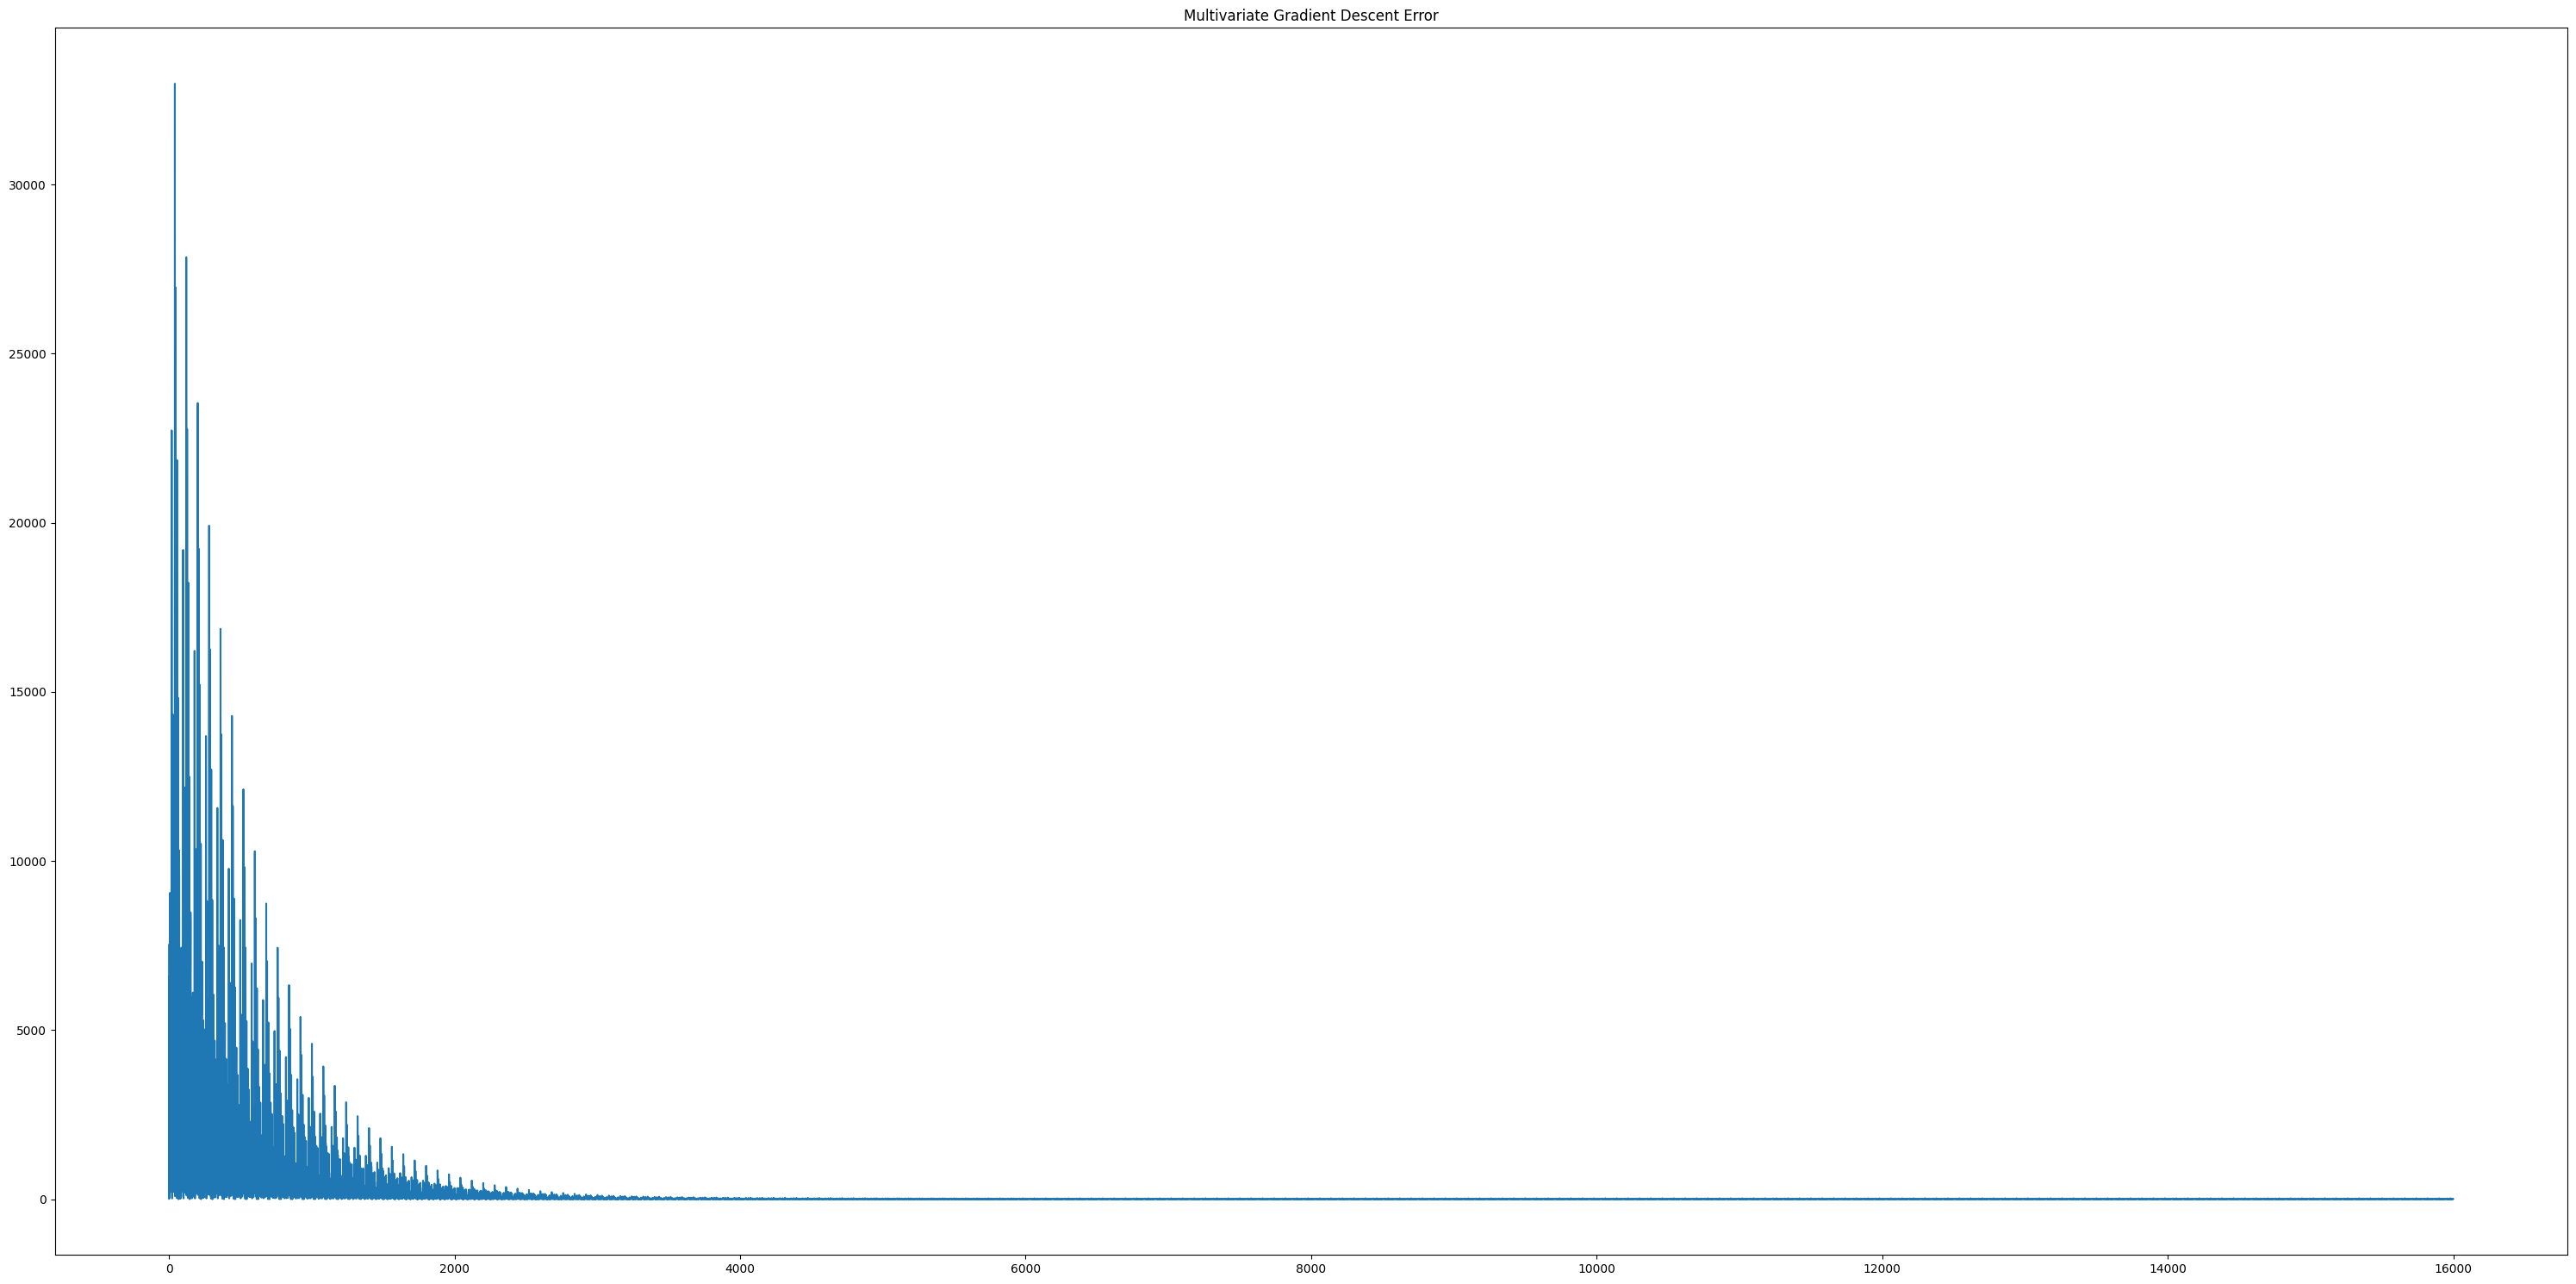

In [72]:
for i in range(len(errors)):
	errors[i] = errors[i]**2
	points.append(i)


plt.figure(figsize=(30, 15))
plt.title("Multivariate Gradient Descent Error")
plt.plot(points, errors)
plt.tight_layout()
plt.show()

# Extra

## Loading Boston Dataset

In [73]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

## Splitting Data

This is not a very linear dataset but extracting 5 features gives us something vaguely linear. 

In [74]:
X_train, X_test, y_train, y_test = train_test_split(housing.data[:, np.newaxis, 5], housing.target, test_size=0.2, random_state=0)

## Learning

In [75]:
regr = linear_model.LinearRegression() 
regr.fit(X_train, y_train)

LinearRegression()

## Compute mean using testing data

In [76]:
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

print('Variance score: %.2f' % regr.score(X_test, y_test))

Mean squared error: 1.31
Variance score: -0.01


## Augmentation

Augmentation in this context refers to adding a dummy/bias feature $x_{j,0} = 1$ to simplify the handling of weights in multivariate linear regression.

The code shows this by:
1. Adding a 1 at the beginning of each input vector: `[1] + X_train[i]`
2. This creates an augmented feature vector where $x_{j,0} = 1$ for all examples

This is useful because:
1. It lets us write the prediction in a simpler form:
   $h_w(x_j) = \sum_{i=0}^{n} w_i x_{j,i}$
   Instead of having to write:
   $h_w(x_j) = w_0 + \sum_{i=1}^{n} w_i x_{j,i}$

2. Augmentation makes learning simpler by incorporating the intercept/bias term $w_0$ into the weight vector

In the linear regression context from the slides, $w_0$ is called the intercept or bias term, and adding this augmented feature of 1 allows us to learn this term just like any other weight in the model.

In [77]:
num_features: int = len(X_train[0])

X_train= X_train.tolist()
y_train= y_train.tolist() 
X_test= X_test.tolist()
y_test= y_test.tolist()


for i in range(len(X_train)):
	X_train[i] = [1] + X_train[i]

for i in range(len(X_test)):
	X_test[i] = [1] + X_test[i]

## Parameters

In [78]:
alpha = 0.001  # Learning rate
repeats = 1000

In [79]:
weights: list[int]=[0] * (num_features + 1) # list of weights
errors = []
points = []

## Gradient Descent

In [80]:
for j in range(repeats):
	for i in range(len(X_train)):
		predict = 0
    	# Prediction
		for k in range(len(weights)):
			predict += (X_train[i][k] * weights[k])
	
		# Error
		error = y_train[i] - predict
		errors.append(error) # Stash the error in an array

        # Update weights
		for k in range(len(weights)):
			weights[k] +=  ((alpha * error) * X_train[i][k])
     

for k in range(len(weights)):
	print ("w"+str(k)+": %2f" % weights[k])

w0: nan
w1: nan


## Compute mean using testing data

In [81]:
predicts = []
mean_error = 0

for i in range(len(X_test)):
	
	# Prediction
	predict = 0
	for k in range(len(weights)):
		predict +=  (X_test[i][k] * weights[k])
	predicts.append(predict)
	
	# Error
	error: float = (y_test[i] - predict) ** 2 # Computing squared error
	mean_error += error
	

mean_error: float = mean_error / len(X_test) # Computing mean squared error
print("Mean squared error: %2f" % mean_error)

Mean squared error: nan


## Ploting

In [ ]:
# for i in range(len(errors)):
# 	errors[i] = errors[i] ** 2
# 	points.append(i)


# plt.figure(figsize=(30, 15))
# plt.title("Multivariate Gradient Descent Error")
# plt.plot(points, errors)
# plt.tight_layout()
# plt.show()